In [1]:
from scipy import stats
from sklearn.linear_model import LinearRegression
from statsmodels.compat import lzip
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/PEWDIEPIE_video_data_UP.csv")
df2 = pd.read_csv("../data/MRBEAST_video_data_UP.csv")
df3 = pd.read_csv("../data/MRBEAST2_video_data_UP.csv")
df_coco = pd.read_csv("../data/DaFuqBoom_video_data_UP.csv")
df_boom = pd.read_csv("../data/5minCrafts_video_data_UP.csv")

<class 'pandas.core.series.Series'>
RangeIndex: 4555 entries, 0 to 4554
Series name: pushblishDayName
Non-Null Count  Dtype 
--------------  ----- 
4555 non-null   object
dtypes: object(1)
memory usage: 35.7+ KB


<AxesSubplot:xlabel='pushblishDayName', ylabel='viewCount'>

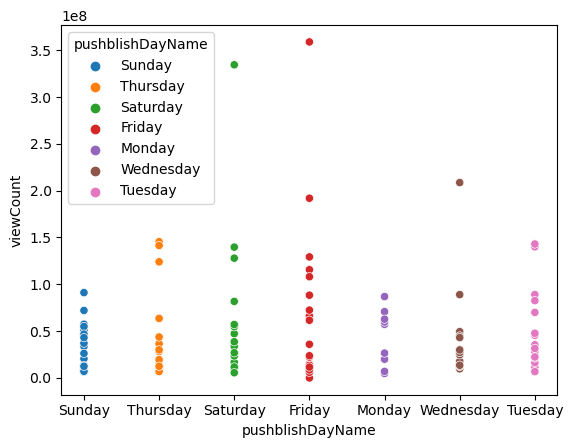

In [18]:
df.pushblishDayName.info()
# fig, ax = plt.subplots(1, 3)
# sns.scatterplot(data=df, x = 'likeCount', y='viewCount', ax = ax[0])
# sns.scatterplot(data=df, x = 'commentCount', y='viewCount', ax = ax[1])
# sns.scatterplot(data=df3, x = 'durationSecs', y='viewCount')
sns.scatterplot(data=df3, x = 'pushblishDayName', y='viewCount', hue='pushblishDayName')

In [4]:
df.sort_values(by='viewCount', ascending=False)

,Unnamed: 0,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption,pushblishDayName,durationSecs,tagsCount,likeRatio,commentRatio,titleLength
1023,1023,6Dh-RL__uN4,PewDiePie,bitch lasagna,► Spotify: https://spoti.fi/2RO79mu \n► iTunes...,"['SATIRE', 'tseries', 't series', 'diss', 'tra...",2018-10-05 17:16:40+00:00,317477545.0,12863320.0,NaN,1221426.0,PT2M15S,hd,True,Friday,0 days 00:02:15,12,40.517259,3.847283,13
867,867,PHgc8Q6qTjc,PewDiePie,Congratulations,Roomie’s video: https://www.youtube.com/watch?...,"['SATIRE', 'Congratulations', 'pewdiepie', 'pe...",2019-03-31 16:50:30+00:00,232678674.0,10465162.0,NaN,987152.0,PT4M19S,hd,True,Sunday,0 days 00:04:19,15,44.976885,4.242555,15
1943,1943,MsplPPW7tFo,PewDiePie,LEVEL 7 | I’M NOT CRAZY (OUTLAST IRL GAMEPLAY),Combine a rundown asylum with a talking electr...,"['PewDiePie', 'YouTube Red', 'YouTube Red Orig...",2016-02-10 09:25:07+00:00,133201845.0,2919179.0,NaN,150651.0,PT4S,hd,False,Wednesday,0 days 00:00:04,9,21.915455,1.130998,47
3410,3410,gRyPjRrjS34,PewDiePie,A Funny Montage,I'm just a guy from Sweden who likes to laugh ...,"['pewdiepie', 'pewdie', 'lets', 'play', 'let´s...",2013-06-04 15:30:10+00:00,94014184.0,1914018.0,NaN,NaN,PT10M53S,hd,False,Tuesday,0 days 00:10:53,16,20.358822,NaN,15
1573,1573,7Vj5M0qKh8g,PewDiePie,THE RUBY PLAYBUTTON / YouTube 50 Mil Sub Rewar...,Unboxing the 50 mil sub reward ruby playbutton...,"['pewdiepie', 'pewds', 'pdp', 'pewdie']",2016-12-18 16:04:54+00:00,91169177.0,6062938.0,NaN,615422.0,PT9M59S,hd,True,Sunday,0 days 00:09:59,4,66.502059,6.750330,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1910,1910,J9GpfqyUAVI,PewDiePie,LEVEL 4 | TIME TO DIE MR. PIE,From Q and A to meat maze. This is the YouTube...,"['PewDiePie', 'YouTube Red', 'YouTube Red Orig...",2016-03-02 18:37:26+00:00,NaN,NaN,NaN,NaN,PT17M25S,hd,True,Wednesday,0 days 00:17:25,9,NaN,NaN,29
1921,1921,-Cn2fUrUKRo,PewDiePie,LEVEL 3 | HELLO TIMMY,It was the strangest day. I started off with a...,"['PewDiePie', 'YouTube Red', 'YouTube Red Orig...",2016-02-24 18:08:22+00:00,NaN,NaN,NaN,NaN,PT15M32S,hd,True,Wednesday,0 days 00:15:32,9,NaN,NaN,21
1932,1932,_AatGduGclc,PewDiePie,LEVEL 2 | WE’RE NOT ALONE,The US government needs a Swede to save the da...,"['PewDiePie', 'YouTube Red', 'YouTube Red Orig...",2016-02-17 18:07:49+00:00,NaN,NaN,NaN,NaN,PT18M34S,hd,True,Wednesday,0 days 00:18:34,9,NaN,NaN,25
1941,1941,0-fyoq4454U,PewDiePie,LEVEL 1 | LET’S PLAY DOCTOR,That moment when you’re getting a physical exa...,"['PewDiePie', 'YouTube Red', 'YouTube Red Orig...",2016-02-10 09:29:58+00:00,NaN,NaN,NaN,NaN,PT23M15S,hd,True,Wednesday,0 days 00:23:15,9,NaN,NaN,27


In [5]:
df2.sort_values(by='viewCount', ascending=False)

,Unnamed: 0,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption,pushblishDayName,durationSecs,tagsCount,likeRatio,commentRatio,titleLength
39,39,se50viFJ0AQ,MrBeast,Would You Fly To Paris For A Baguette?,New Merch - https://shopmrbeast.com/\n\nSUBSCR...,NaN,2022-12-08 20:12:27+00:00,961558729.0,40931775.0,NaN,85184.0,PT48S,hd,False,Thursday,0 days 00:00:48,0,42.568149,0.088589,38
43,43,YlvcFJOE-OE,MrBeast,Giving iPhones Instead Of Candy on Halloween,New Merch - https://shopmrbeast.com/\n\nSUBSCR...,NaN,2022-11-02 21:00:01+00:00,916947070.0,29821541.0,NaN,111353.0,PT40S,hd,False,Wednesday,0 days 00:00:40,0,32.522642,0.121439,44
59,59,0e3GPea1Tyg,MrBeast,"$456,000 Squid Game In Real Life!",MAKE SURE YOU WATCH UNTIL GLASS BRIDGE IT'S IN...,NaN,2021-11-24 21:00:01+00:00,520923288.0,17142371.0,NaN,620238.0,PT25M42S,hd,True,Wednesday,0 days 00:25:42,0,32.907669,1.190651,33
45,45,S_CUEOBZ0P4,MrBeast,"The Rock Vs MrBeast For $100,000",Winning totally Rocks!\n\nNew Merch - https://...,NaN,2022-10-21 20:00:06+00:00,414558011.0,25471390.0,NaN,64052.0,PT55S,hd,False,Friday,0 days 00:00:55,0,61.442281,0.154507,32
64,64,zxYjTTXc-J8,MrBeast,"Last To Leave Circle Wins $500,000",THIS WAS THE CRAZIEST THING IVE EVER DONE!\n\n...,NaN,2021-08-31 20:01:03+00:00,359401434.0,6526962.0,NaN,121427.0,PT17M44S,hd,True,Tuesday,0 days 00:17:44,0,18.160645,0.337859,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
616,616,OffgqPzDi7Q,MrBeast,Vanoss vs Speedy! Who is better? Updated.,Let me know what you think down below and who ...,"['How', 'much', 'money', 'does', 'make', 'blac...",2014-08-20 01:57:30+00:00,39274.0,1131.0,NaN,324.0,PT3M45S,hd,False,Wednesday,0 days 00:03:45,11,28.797678,8.249733,41
621,621,HduubRTdko4,MrBeast,"How Much Does ""Epic Rap Battles"" Make?????","I really enjoy ERB, so I decided to make a vid...","['mrbeast6000', 'titanfall', 'money', 'does', ...",2014-07-10 23:05:51+00:00,39269.0,1057.0,NaN,192.0,PT3M20S,hd,False,Thursday,0 days 00:03:20,25,26.916906,4.889353,42
622,622,qFOGv5zuTdw,MrBeast,How Much Money Does FaZe Make?????,In this video I talk about FaZe and how much m...,"['mrbeast6000', 'titanfall', 'money', 'does', ...",2014-07-09 21:15:15+00:00,39267.0,1165.0,NaN,255.0,PT3M18S,hd,False,Wednesday,0 days 00:03:18,25,29.668679,6.494003,34
623,623,u6t4jrhs56Q,MrBeast,"Top Youtube ""ShoutOuts""",This video is a little different but I think i...,"['mrbeast6000', 'titanfall', 'money', 'does', ...",2014-07-09 00:07:05+00:00,39266.0,1431.0,NaN,301.0,PT6M5S,hd,False,Wednesday,0 days 00:06:05,27,36.443743,7.665665,23


In [6]:
df3.sort_values(by='viewCount', ascending=False)

,Unnamed: 0,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption,pushblishDayName,durationSecs,tagsCount,likeRatio,commentRatio,titleLength
103,103,Dx0Da_Y2fBg,MrBeast 2,I Am The World’s Greatest Samurai,#Shorts The title is total not a joke,NaN,2020-09-18 13:15:01+00:00,358770038,11024531,NaN,59457,PT11S,hd,False,Friday,11.0,0,30.728684,0.165725,33
9,9,NPYPXWJBTWM,MrBeast 2,"$10,000 Girl Scout Cookies",NaN,NaN,2023-03-11 17:00:47+00:00,334334553,9837328,NaN,14829,PT23S,hd,False,Saturday,23.0,0,29.423606,0.044354,26
63,63,RS9jRyYFFQM,MrBeast 2,POV: You Enter The Elevator,ill just take the next one #shorts,NaN,2021-09-22 16:05:05+00:00,208588414,7954443,NaN,42677,PT10S,hd,False,Wednesday,10.0,0,38.134635,0.204599,27
6,6,on94ouT1TQI,MrBeast 2,"Solve this Mystery, Win a Lamborghini",NaN,NaN,2023-04-07 20:00:02+00:00,191879967,10242079,NaN,18420,PT1M,hd,False,Friday,60.0,0,53.377532,0.095998,37
2,2,SGzWIoLAzmY,MrBeast 2,"Feeding A Cat $10 Vs $10,000 Sushi",NaN,NaN,2023-08-31 17:00:00+00:00,145417200,7194440,NaN,16227,PT31S,hd,False,Thursday,31.0,0,49.474478,0.111589,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,3,sHX6pzhdCP0,MrBeast 2,"$30,000 Relay Race",Play Stumble Guys Now!:\n\nhttps://stumbleguys...,NaN,2023-08-13 17:20:26+00:00,6501124,471223,NaN,2527,PT42S,hd,False,Sunday,42.0,0,72.483312,0.388702,18
60,60,DMP-uU2988Q,MrBeast 2,Help Us Save The Ocean,Help us reach our goal! go to https://teamseas...,NaN,2021-10-29 20:06:47+00:00,5995259,466133,NaN,4817,PT46S,hd,False,Friday,46.0,0,77.750269,0.803468,22
98,98,I3-jhBCcQso,MrBeast 2,I Put A Firework Under A Trashcan,Epic #shorts,NaN,2020-09-26 13:15:01+00:00,5538013,232973,NaN,10702,PT15S,hd,False,Saturday,15.0,0,42.067976,1.932462,33
45,45,nsbHrMXdu3o,MrBeast 2,POV: You’re Sitting On My Lap,NaN,NaN,2022-04-18 19:00:14+00:00,4778004,260175,NaN,4721,PT11S,hd,False,Monday,11.0,0,54.452654,0.988069,29


In [7]:
# calculate IQR for column Height
Q1 = df2['viewCount'].quantile(0.25)
Q3 = df2['viewCount'].quantile(0.75)
IQR = Q3 - Q1

# identify outliers
threshold = 1.5
outliers = df2[(df2['viewCount'] < Q1 - threshold * IQR) | (df2['viewCount'] > Q3 + threshold * IQR)]

<AxesSubplot:xlabel='commentRatio', ylabel='viewCount'>

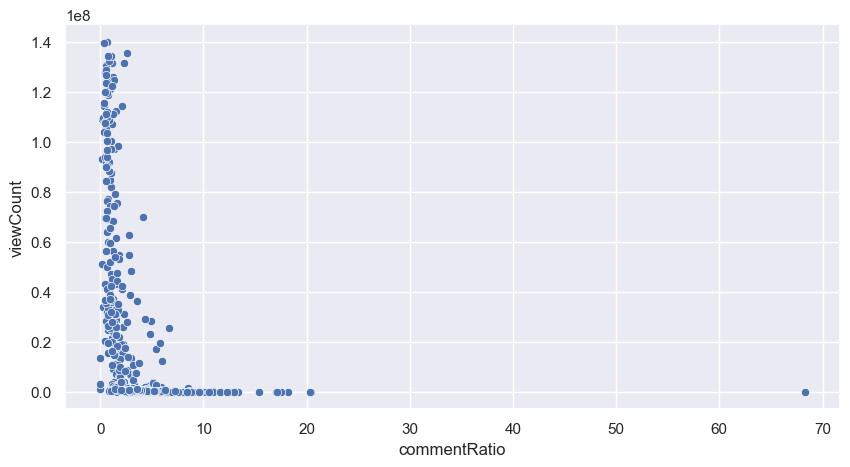

In [21]:
df4 = df2.drop(outliers.index)
sns.scatterplot(y='viewCount',x='commentRatio', data = df4)

In [9]:
## your code goes here
df5 = df2.dropna(axis=1, how='all')
df6 = df5.dropna(axis=0)

df7 = df.dropna(axis=1, how='all')
df8 = df7.dropna(axis=0)

df9 = df3.dropna(axis=1, how='all')
df10 = df9.dropna(axis=0)

df11 = df_coco.dropna(axis=1, how='all')
df12 = df11.dropna(axis=0)

df13 = df_boom.dropna(axis=1, how='all')
df14 = df13.dropna(axis=0)

big = [df6, df8, df10, df12]
bf = pd.concat(big)

X = bf.select_dtypes(exclude=['object'])
X = X.drop(['viewCount', 'Unnamed: 0', 'caption'], axis=1)
y = bf['viewCount']


model0 = LinearRegression()
model0.fit(X, y)

print("sklearn intercept: ", model0.intercept_, "\nsklearn R^2\t : ", model0.score(X,y))

z = sm.add_constant(X)
model1 = sm.OLS(y.astype(float), z.astype(float)).fit()

print("\n", model1.summary(alpha=0.1))

# https://www.statsmodels.org/devel/generated/statsmodels.regression.linear_model.RegressionResults.scale.html#statsmodels.regression.linear_model.RegressionResults.scale
print(model1.scale)

sklearn intercept:  10591804.377150286 
sklearn R^2	 :  0.8975358699802658

                             OLS Regression Results                            
Dep. Variable:              viewCount   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     7511.
Date:                Mon, 27 Nov 2023   Prob (F-statistic):               0.00
Time:                        17:32:58   Log-Likelihood:                -87728.
No. Observations:                5152   AIC:                         1.755e+05
Df Residuals:                    5145   BIC:                         1.755e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|       [0.05       0.95]
----------------------------------------------------

<AxesSubplot:xlabel='likeCount', ylabel='viewCount'>

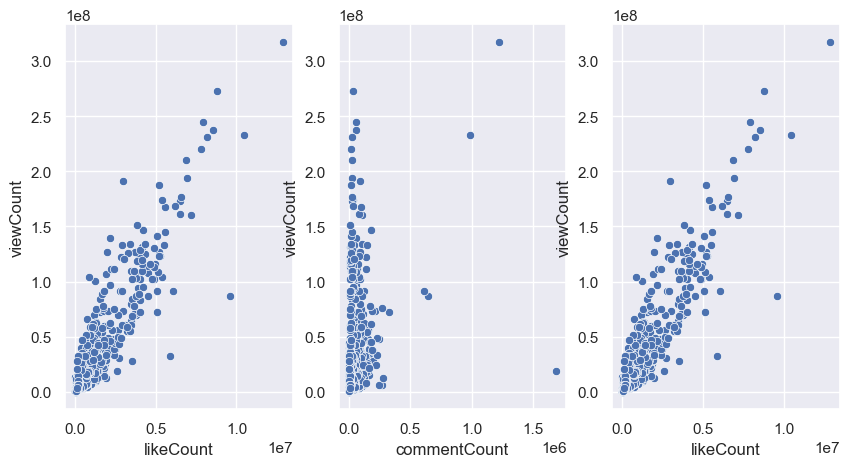

In [16]:
fig, ax = plt.subplots(1, 3)
sns.scatterplot(data=bf, x = 'likeCount', y='viewCount', ax = ax[0])
sns.scatterplot(data=bf, x = 'commentCount', y='viewCount', ax = ax[1])
sns.scatterplot(data=bf, x = 'likeCount', y='viewCount', ax = ax[2])

In [11]:
X2 = X.drop(['titleLength'],axis=1)

z = sm.add_constant(X2)
model2 = sm.OLS(y.astype(float), z.astype(float)).fit()

print(model2.summary(alpha=0.1))
print(model2.scale)

                            OLS Regression Results                            
Dep. Variable:              viewCount   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     8958.
Date:                Mon, 27 Nov 2023   Prob (F-statistic):               0.00
Time:                        17:32:58   Log-Likelihood:                -87743.
No. Observations:                5152   AIC:                         1.755e+05
Df Residuals:                    5146   BIC:                         1.755e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|       [0.05       0.95]
--------------------------------------------------------------------------------
const         9.459e+06   2.93e+05     32.277   

In [12]:
test = sm.stats.anova_lm(model1, model2)
print(test)

   df_resid           ssr  df_diff       ss_diff          F  Pr(>F)
0    5145.0  1.861303e+17      0.0           NaN        NaN     NaN
1    5146.0  1.871984e+17     -1.0 -1.068125e+15  29.362271     NaN


Text(0.5, 1.0, 'Model2 Residuals Q-Q Plot')

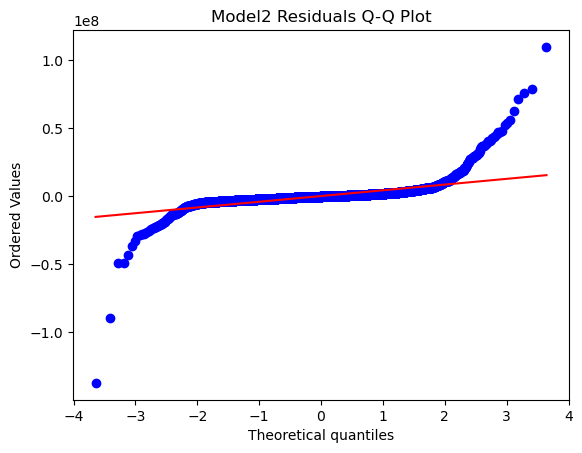

In [13]:
stats.probplot(model2.resid, dist="norm", plot= plt)
plt.title("Model2 Residuals Q-Q Plot")

<AxesSubplot:xlabel='likeCount', ylabel='viewCount'>

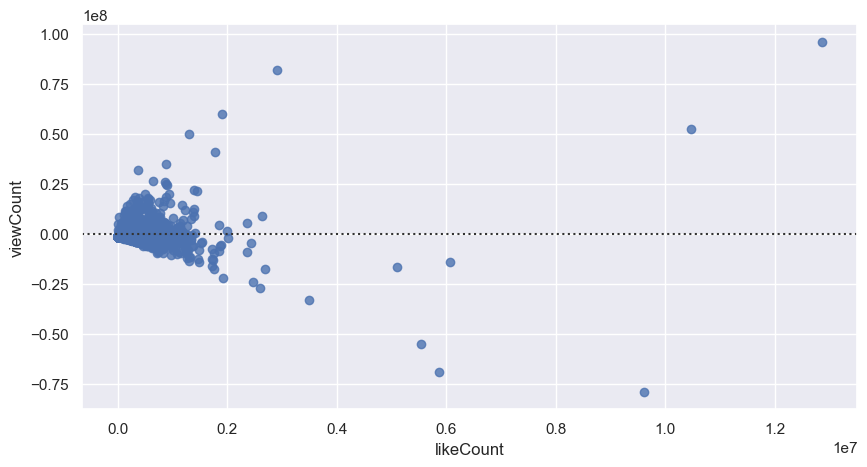

In [14]:
sns.set(rc = {'figure.figsize':(10,5)})
sns.residplot(y = 'viewCount',x = 'likeCount', data = df)